## Overfitting Large Models 

In [1]:
from Shakespeak.utils import CharDataSet, generate, perplexity_graph, load_model_metrics

### Overfitting and Children Stories

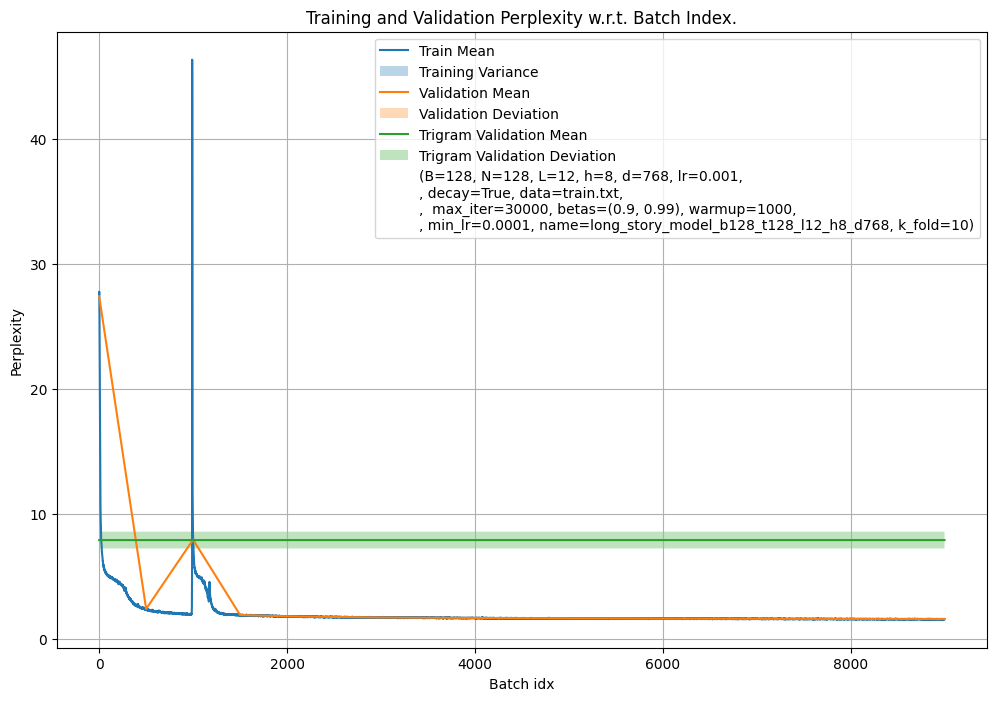

In [3]:
stories_data = CharDataSet(128, dataset_path='../datasets/train.txt')   # takes ~5 min to execute for the first time.
V = stories_data.get_vocab_size()                                       # then the file is locally encoded, takes 1s to re-run. 

stories_model, stories_params, stories_train_loss, stories_valid_loss = load_model_metrics(
    '../pretrained_models/long_story_model_b128_t128_l12_h8_d768/long_story_model_b128_t128_l12_h8_d768_0_9000.pt', V)

perplexity_graph(
    stories_train_loss.unsqueeze(0), stories_valid_loss.unsqueeze(0), 
    val_int=stories_params['val_int'], name="long_model", args=stories_params            
)

Clearly, when it comes to children stories, the model didn't appear to overfit at all and stayed stable as iterations progressed. 

In [3]:
print(generate(stories_model, stories_data, "Here's a story :", 150))

Here's a story : I'm going to tie my suit set, but something different has the big ears.""

Danny found a hidden worm, spotting the blue jar up in her close. She was 


###  Overfitting and Shakespear

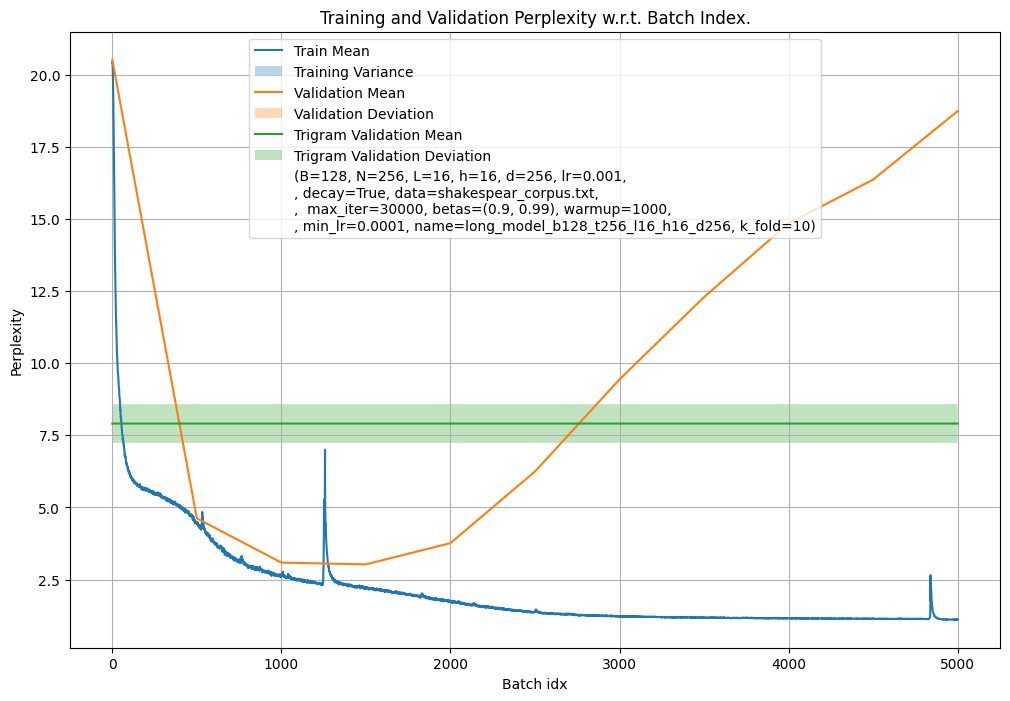

In [4]:
data_shakespear = CharDataSet(128, dataset_path='../datasets/shakespear_corpus.txt')
V = data_shakespear.get_vocab_size()

shake_model, shake_params, shake_train_loss, shake_valid_loss = load_model_metrics(
    '../pretrained_models/long_model_b128_t256_l16_h16_d256/long_model_b128_t256_l16_h16_d256_0_5000.pt', V)

perplexity_graph(
    shake_train_loss.unsqueeze(0), shake_valid_loss.unsqueeze(0), 
    val_int=shake_params['val_int'], name="long_model", args=shake_params            
)

Completely different story when it came to shakespear. As iterations went up we ended up having a model that just repeated whatever it saw in the text by heart. This makes sense as the Shakespear corpa is ~1 MB large whilst the Stories one is about 100 MB large.

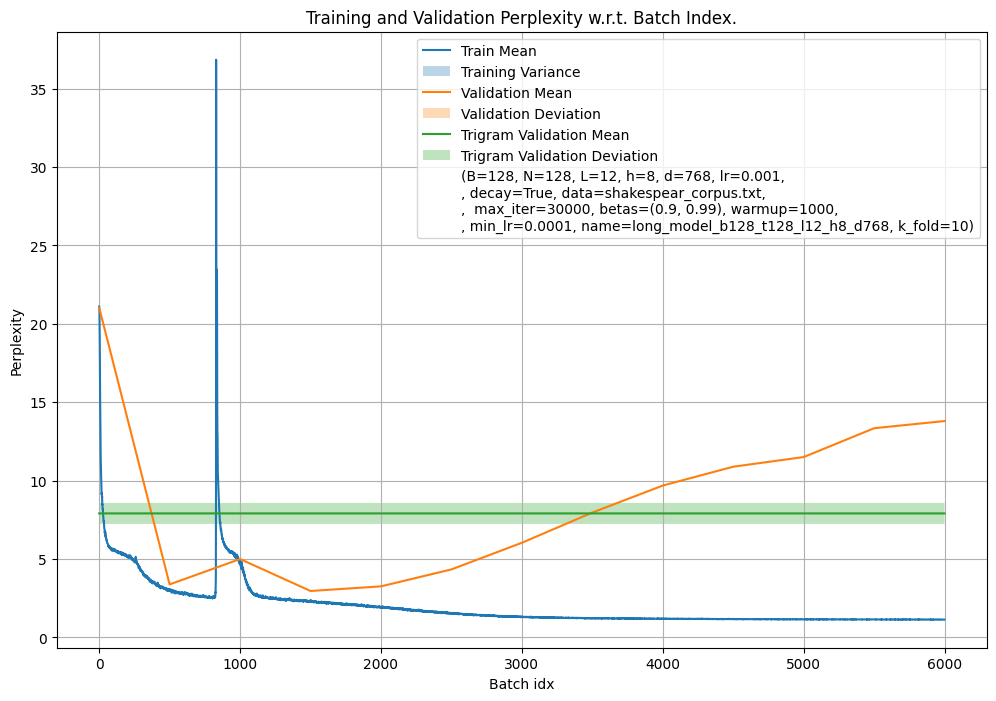

In [5]:
longd_shake_model, longd_shake_params, longd_shake_train_loss, longd_shake_valid_loss = load_model_metrics(
    '../pretrained_models/long_model_b128_t128_l12_h8_d768/long_model_b128_t128_l12_h8_d768_0_6000.pt', V)

perplexity_graph(
    longd_shake_train_loss.unsqueeze(0), longd_shake_valid_loss.unsqueeze(0), 
    val_int=longd_shake_params['val_int'], name="longd_model", args=longd_shake_params            
)

In [8]:
new_tokens = generate(shake_model, data_shakespear,"FRANCOIS:\nI am getting married.\n\nJULIEN:", 150)
print(new_tokens)

FRANCOIS:
I am getting married.

JULIEN:
Sirrah, condemnine was excuse more to his father;
Which man he hath follows to his unto live.

HENRY BOLINGBROKE:
What is the matter, the first of de


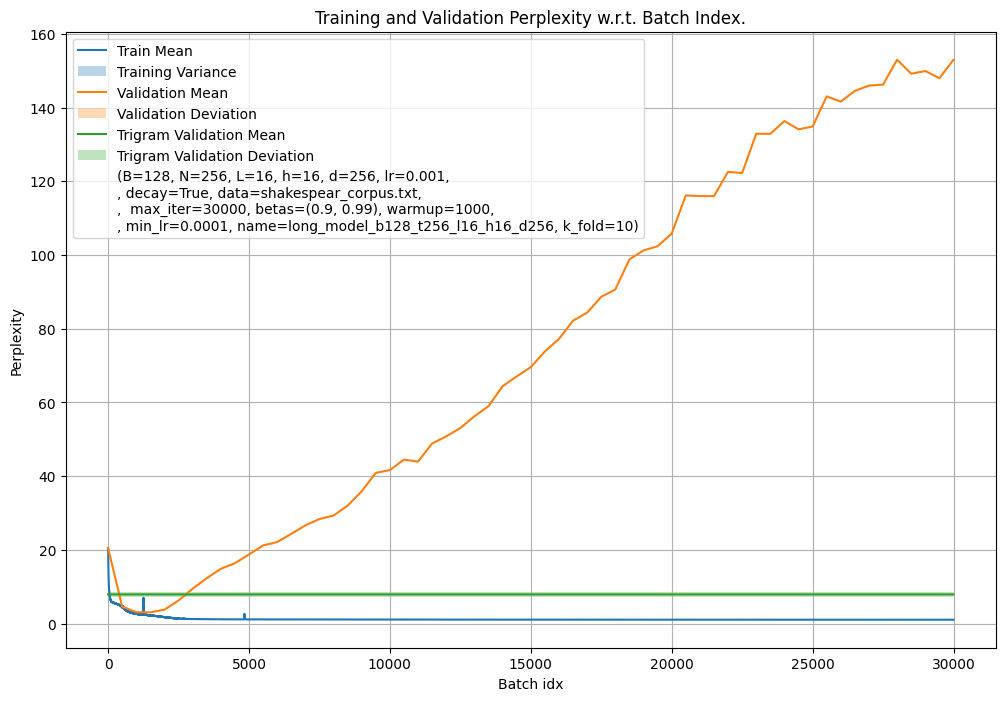

In [15]:
shake_model_30k, shake_params_30k, shake_train_loss_30k, shake_valid_loss_30k = load_model_metrics(
    '../pretrained_models/long_model_b128_t256_l16_h16_d256/long_model_b128_t256_l16_h16_d256_3_30000.pt', V)

perplexity_graph(
    shake_train_loss_30k.unsqueeze(0), shake_valid_loss_30k.unsqueeze(0), 
    val_int=shake_params_30k['val_int'], name="long_model", args=shake_params_30k            
)

Yeah, no surprise here, the validation loss climbs to mount everest.

In [10]:
new_tokens = generate(shake_model_30k, data_shakespear,"You are a fool !\n\nMARCIUS:", 250)
print(new_tokens)

You are a fool !

MARCIUS:
Those are they
The season comforted or by the worst,
If we would have you.

CLARENCE:
Would you not do but see here, my lord?

KING EDWARD IV:
What, Clarence, to myself.

GLOUCESTER:
That would be ten days' wonder at the least.

CLARENCE:
That's a d


The generated text above is the same as within the dataset. Clearly, overfitting. 

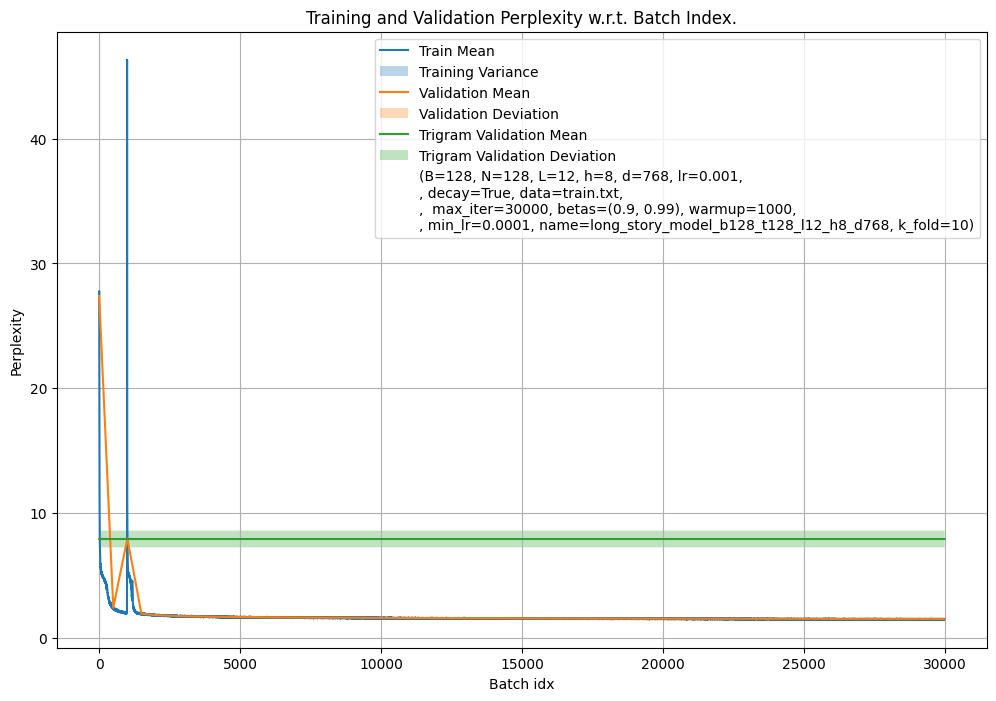

In [4]:
story_model_30k, story_params_30k, story_train_loss_30k, story_valid_loss_30k = load_model_metrics(
    '../pretrained_models/long_story_model_b128_t128_l12_h8_d768_0_30000.pt', V)

perplexity_graph(
    story_train_loss_30k.unsqueeze(0), story_valid_loss_30k.unsqueeze(0), 
    val_int=story_params_30k['val_int'], name="long_model", args=story_params_30k            
)

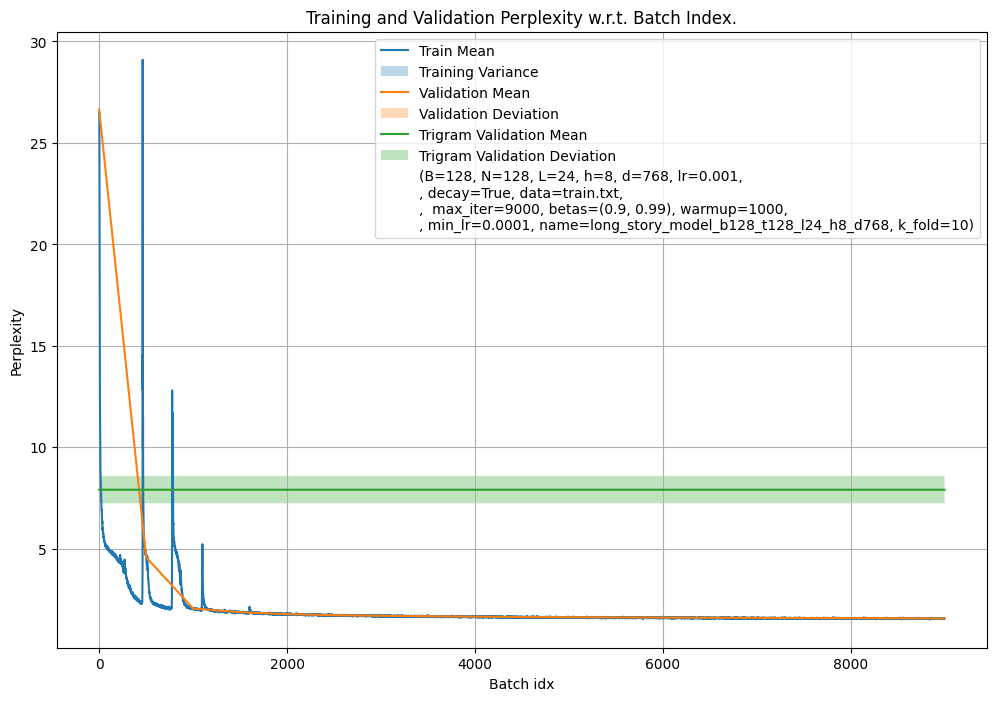

In [5]:
story_model_9k, story_params_9k, story_train_loss_9k, story_valid_loss_9k = load_model_metrics(
    '../pretrained_models/long_story_model_b128_t128_l24_h8_d768_0_9000.pt', V)

perplexity_graph(
    story_train_loss_9k.unsqueeze(0), story_valid_loss_9k.unsqueeze(0), 
    val_int=story_params_9k['val_int'], name="super_tall_long_model", args=story_params_9k            
)